<a href="https://colab.research.google.com/github/joao-zip/projeto-ia/blob/main/notebooks/data_cleaning_and_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtenção dos dados

In [1]:
# Clonando os dados para que o notebook possa ser executado no Google Colab.

!git clone https://github.com/joao-zip/projeto-ia.git

!ls

Cloning into 'projeto-ia'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 65 (delta 29), reused 52 (delta 23), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 6.95 MiB | 16.86 MiB/s, done.
Resolving deltas: 100% (29/29), done.
projeto-ia  sample_data


In [2]:
import pandas as pd
import glob
import os

nome_repo = "projeto-ia"
caminho_dados = os.path.join(nome_repo, 'data/')

caminho_dados

padrao_arquivos = os.path.join(caminho_dados, '2024*_CPGF.csv')
lista_arquivos = glob.glob(padrao_arquivos)


if not lista_arquivos:
    print("Nenhum arquivo encontrado.")
else:
    print(f"Arquivos encontrados: {lista_arquivos}")

Arquivos encontrados: ['projeto-ia/data/202401_CPGF.csv', 'projeto-ia/data/202407_CPGF.csv', 'projeto-ia/data/202402_CPGF.csv', 'projeto-ia/data/202409_CPGF.csv', 'projeto-ia/data/202412_CPGF.csv', 'projeto-ia/data/202404_CPGF.csv', 'projeto-ia/data/202410_CPGF.csv', 'projeto-ia/data/202411_CPGF.csv', 'projeto-ia/data/202405_CPGF.csv', 'projeto-ia/data/202406_CPGF.csv', 'projeto-ia/data/202408_CPGF.csv', 'projeto-ia/data/202403_CPGF.csv']


In [4]:
if not lista_arquivos:
    print("Deu problema pra detectar os dados")
else:
    lista_dfs = []
    for arquivo in lista_arquivos:
        df_mes = pd.read_csv(arquivo, sep=';', encoding='latin-1', low_memory=False)
        lista_dfs.append(df_mes)

    df_2024_completo = pd.concat(lista_dfs, ignore_index=True)
    print("\n--- Dados carregados com sucesso! ---")
    print(df_2024_completo.info())

    print(f"\n\n{df_2024_completo.head()}")


--- Dados carregados com sucesso! ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143150 entries, 0 to 143149
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   CÓDIGO ÓRGÃO SUPERIOR   143150 non-null  int64 
 1   NOME ÓRGÃO SUPERIOR     143150 non-null  object
 2   CÓDIGO ÓRGÃO            143150 non-null  int64 
 3   NOME ÓRGÃO              143150 non-null  object
 4   CÓDIGO UNIDADE GESTORA  143150 non-null  int64 
 5   NOME UNIDADE GESTORA    143150 non-null  object
 6   ANO EXTRATO             143150 non-null  int64 
 7   MÊS EXTRATO             143150 non-null  int64 
 8   CPF PORTADOR            104576 non-null  object
 9   NOME PORTADOR           143150 non-null  object
 10  CNPJ OU CPF FAVORECIDO  143150 non-null  int64 
 11  NOME FAVORECIDO         143150 non-null  object
 12  TRANSAÇÃO               143150 non-null  object
 13  DATA TRANSAÇÃO          104576 non-null  object
 1

In [5]:
df = df_2024_completo.copy() # para tirar os avisos do pandas

# 1 - Limpeza da coluna de VALOR (object para numérico)
df['VALOR TRANSAÇÃO'] = df['VALOR TRANSAÇÃO'].str.replace(',', '.', regex=False)
df['VALOR TRANSAÇÃO'] = pd.to_numeric(df['VALOR TRANSAÇÃO'], errors='coerce')

# 2 - Limpeza da coluna de DATA
df['DATA TRANSAÇÃO'] = pd.to_datetime(df['DATA TRANSAÇÃO'], format='%d/%m/%Y', errors='coerce')

# 3 - Removendo os NaN
df.dropna(subset=['VALOR TRANSAÇÃO', 'DATA TRANSAÇÃO'], inplace=True)

# 4 - Como ficou
df.info()
df['VALOR TRANSAÇÃO'].describe()

<class 'pandas.core.frame.DataFrame'>
Index: 104576 entries, 0 to 143149
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CÓDIGO ÓRGÃO SUPERIOR   104576 non-null  int64         
 1   NOME ÓRGÃO SUPERIOR     104576 non-null  object        
 2   CÓDIGO ÓRGÃO            104576 non-null  int64         
 3   NOME ÓRGÃO              104576 non-null  object        
 4   CÓDIGO UNIDADE GESTORA  104576 non-null  int64         
 5   NOME UNIDADE GESTORA    104576 non-null  object        
 6   ANO EXTRATO             104576 non-null  int64         
 7   MÊS EXTRATO             104576 non-null  int64         
 8   CPF PORTADOR            104576 non-null  object        
 9   NOME PORTADOR           104576 non-null  object        
 10  CNPJ OU CPF FAVORECIDO  104576 non-null  int64         
 11  NOME FAVORECIDO         104576 non-null  object        
 12  TRANSAÇÃO               104576 non-

,VALOR TRANSAÇÃO
count,104576.000000
mean,538.880169
std,1385.544455
min,0.040000
25%,103.000000
50%,257.285000
75%,620.000000
max,189650.000000


In [6]:
# Agora vou criar novas colunas para detalhar mais

df['Mes'] = df['DATA TRANSAÇÃO'].dt.month
df['DiaDaSemana'] = df['DATA TRANSAÇÃO'].dt.dayofweek
df['Dia'] = df['DATA TRANSAÇÃO'].dt.day

df[['DATA TRANSAÇÃO', 'Mes', 'DiaDaSemana', 'Dia']].head()

,DATA TRANSAÇÃO,Mes,DiaDaSemana,Dia
0,2023-12-01,12,4,1
1,2023-11-29,11,2,29
2,2023-11-30,11,3,30
3,2023-12-04,12,0,4
4,2023-11-30,11,3,30


In [7]:
import numpy as np


keywords_hospedagem = ['HOTEL', 'POUSADA', 'RESORT', 'MOTEL']
keywords_transporte_aereo = ['AEREAS', 'AEREA', 'GOL', 'LATAM', 'AZUL', 'LINHAS', 'AEROLINEAS', 'TAP', 'PASSAGENS']
keywords_combustivel = ['POSTO', 'COMBUSTIVEIS', 'PETRO', 'GASOLINA']
keywords_restaurante = ['RESTAURANTE', 'CHURRASCARIA', 'BAR E', 'COM E BEB']
keywords_aluguel_carros = ['LOCADORA', 'ALUGUEL DE CARROS', 'RENT A CAR', 'LOCALIZA', 'MOVIDA', 'UNIDAS']

# categorias para tentar diminuir a quantidade de "outros"
keywords_servicos = ['SERVICOS', 'CONSULTORIA', 'ASSESSORIA', 'PROJETOS', 'SERVIÇO']
keywords_construcao_ferragens = ['CONSTRUCAO', 'MATERIAIS', 'MATERIAL', 'FERRAGENS', 'FERRAMENTAS', 'MAQUINAS', 'ELETRICA']
keywords_pecas_equipamentos = ['PECAS', 'AUTO', 'EQUIPAMENTOS', 'AUTOMOTIVOS']
keywords_informatica_tecnologia = ['INFORMATICA', 'INFORMACAO', 'PAGARME', 'TECNOLOGIA', 'SISTEMAS']
keywords_comercio_geral = ['COMERCIO', 'COMERCIAL', 'DISTRIBUIDORA', 'PRODUTOS', 'CASA']
keywords_supermercado = ['SUPERMERCADOS', 'MERCADO', 'ATACADAO', 'MERCEARIA']

conditions = [
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_hospedagem), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_transporte_aereo), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_combustivel), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_restaurante), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_aluguel_carros), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_servicos), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_construcao_ferragens), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_pecas_equipamentos), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_informatica_tecnologia), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_comercio_geral), case=False, na=False),
    df['NOME FAVORECIDO'].str.contains('|'.join(keywords_supermercado), case=False, na=False)
]

choices = [
    'Hospedagem',
    'Transporte Aéreo',
    'Combustível',
    'Restaurante',
    'Aluguel de Veículos',
    'Serviços',
    'Construção/Ferragens',
    'Peças/Equipamentos',
    'Informática/Tecnologia',
    'Comércio Geral',
    'Supermercado'
]

df['TipoDeGasto'] = np.select(conditions, choices, default='Outros')


print("\n --- Tipos de Gasto ---")
print(df['TipoDeGasto'].value_counts())


 --- Tipos de Gasto ---
TipoDeGasto
Outros                    54933
Comércio Geral            13319
Construção/Ferragens      10730
Informática/Tecnologia     7030
Combustível                6547
Peças/Equipamentos         3982
Serviços                   3353
Supermercado               2717
Restaurante                1434
Transporte Aéreo            274
Hospedagem                  130
Aluguel de Veículos         127
Name: count, dtype: int64


/tmp/ipython-input-8-1456013977.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gastos_por_orgao.values, y=gastos_por_orgao.index, palette='viridis')


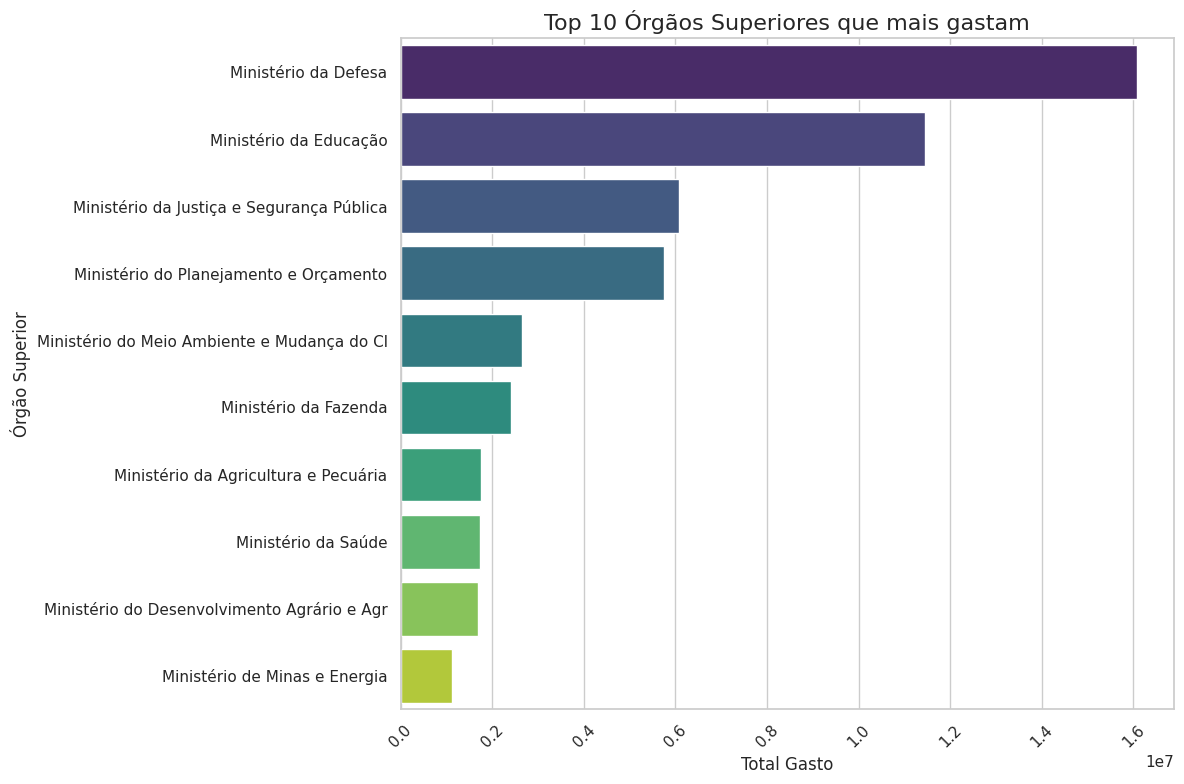

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

gastos_por_orgao = df.groupby('NOME ÓRGÃO SUPERIOR')['VALOR TRANSAÇÃO'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=gastos_por_orgao.values, y=gastos_por_orgao.index, palette='viridis')
plt.title('Top 10 Órgãos Superiores que mais gastam', fontsize=16)
plt.xlabel('Total Gasto', fontsize=12)
plt.ylabel('Órgão Superior', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Encontrei 10720 transações de SAQUE.

Análise dos Valores de Saque:
count    10720.000000
mean       575.905142
std        440.775814
min          2.000000
25%        200.000000
50%        500.000000
75%       1000.000000
max       4979.480000
Name: VALOR TRANSAÇÃO, dtype: float64


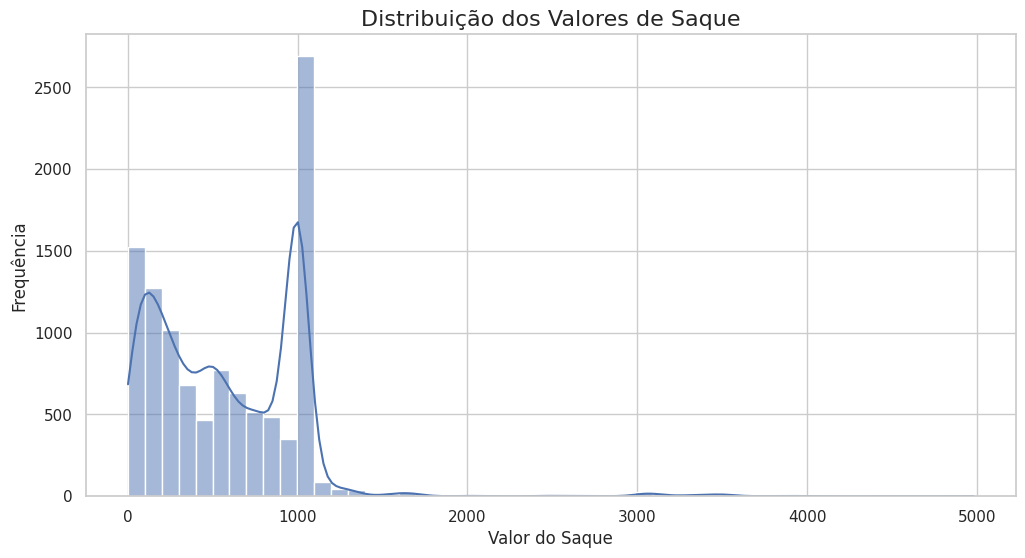

In [10]:
df_saques = df[df['TRANSAÇÃO'].str.contains('SAQUE', case=False, na=False)]

print(f"\nEncontrei {len(df_saques)} transações de SAQUE.")

print("\nAnálise dos Valores de Saque:")
print(df_saques['VALOR TRANSAÇÃO'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(df_saques['VALOR TRANSAÇÃO'], bins=50, kde=True)
plt.title('Distribuição dos Valores de Saque', fontsize=16)
plt.xlabel('Valor do Saque', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.show()

In [11]:
print("\n--- Top 10 Transações Individuais ---")

colunas_relevantes = [
    'DATA TRANSAÇÃO',
    'NOME ÓRGÃO SUPERIOR',
    'NOME FAVORECIDO',
    'TipoDeGasto',
    'VALOR TRANSAÇÃO'
]

top_10_gastos = df[colunas_relevantes].sort_values(by='VALOR TRANSAÇÃO', ascending=False).head(10)
print(top_10_gastos.to_string())


--- Top 10 Transações Individuais ---
      DATA TRANSAÇÃO                        NOME ÓRGÃO SUPERIOR                                    NOME FAVORECIDO             TipoDeGasto  VALOR TRANSAÇÃO
82228     2024-10-03                       Ministério da Defesa                     MARAJO LOCACAO E SERVICOS LTDA                Serviços        189650.00
82132     2024-10-04                       Ministério da Defesa               FRANCISCO E. SILVA CAPIISTRANIO LTDA                  Outros        168000.00
88342     2024-10-17  Ministério da Justiça e Segurança Pública                                     SEM INFORMACAO  Informática/Tecnologia        122038.19
73912     2024-09-17  Ministério da Justiça e Segurança Pública                                     SEM INFORMACAO  Informática/Tecnologia        103864.77
89036     2024-10-24  Ministério da Justiça e Segurança Pública                                     SEM INFORMACAO  Informática/Tecnologia         52812.38
82229     2024-10-08     

In [14]:
# 1. Selecionando as features que usaremos no modelo
features_para_modelo = [
    'VALOR TRANSAÇÃO',
    'Mes',
    'DiaDaSemana',
    'Dia',
    'TipoDeGasto',
    'NOME ÓRGÃO SUPERIOR',
    'TRANSAÇÃO'
]

df_model = df[features_para_modelo].copy()

print("--- dados depois do pre-processamento ---")
print(df_model.head())
print(df_model.info())


# 2. Aplicando One-Hot Encoding nas colunas categóricas
print("\nAplicando One-Hot Encoding nas colunas categóricas")
df_encoded = pd.get_dummies(df_model)


print("\n--- dados depois do Encoding ---")
print(f"O número de colunas aumentou de {df_model.shape[1]} para {df_encoded.shape[1]}.")
print(df_encoded.head())

--- dados depois do pre-processamento ---
   VALOR TRANSAÇÃO  Mes  DiaDaSemana  Dia             TipoDeGasto  \
0            720.0   12            4    1                  Outros   
1           1290.0   11            2   29             Combustível   
2              8.0   11            3   30  Informática/Tecnologia   
3             16.5   12            0    4                  Outros   
4            800.0   11            3   30  Informática/Tecnologia   

        NOME ÓRGÃO SUPERIOR                TRANSAÇÃO  
0  Advocacia-Geral da União  COMPRA A/V - R$ - APRES  
1  Advocacia-Geral da União  COMPRA A/V - R$ - APRES  
2  Advocacia-Geral da União  COMPRA A/V - R$ - APRES  
3  Advocacia-Geral da União  COMPRA A/V - R$ - APRES  
4  Advocacia-Geral da União  COMPRA A/V - R$ - APRES  
<class 'pandas.core.frame.DataFrame'>
Index: 104576 entries, 0 to 143149
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   V

Isolation Forest

In [15]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(n_estimators=100, contamination=0.005, n_jobs=-1, random_state=42)

print("Treinando o modelo Isolation Forest")
previsoes_iso_forest = iso_forest.fit_predict(df_encoded)

df['Anomalia_IsolationForest'] = previsoes_iso_forest

print("Treinamento concluido")

Treinando o modelo Isolation Forest
Treinamento concluido


In [16]:
anomalias_if = df[df['Anomalia_IsolationForest'] == -1]

print(f"\nO modelo Isolation Forest encontrou {len(anomalias_if)} anomalias potenciais.")

colunas_relevantes = [
    'DATA TRANSAÇÃO',
    'NOME ÓRGÃO SUPERIOR',
    'NOME FAVORECIDO',
    'TipoDeGasto',
    'VALOR TRANSAÇÃO'
]

print("\n--- Anomalias Encontradas pelo Isolation Forest---")
print(anomalias_if[colunas_relevantes].sort_values(by='VALOR TRANSAÇÃO', ascending=False).to_string())


O modelo Isolation Forest encontrou 523 anomalias potenciais.

--- Anomalias Encontradas pelo Isolation Forest---
       DATA TRANSAÇÃO                           NOME ÓRGÃO SUPERIOR                                                         NOME FAVORECIDO             TipoDeGasto  VALOR TRANSAÇÃO
88342      2024-10-17     Ministério da Justiça e Segurança Pública                                                          SEM INFORMACAO  Informática/Tecnologia        122038.19
73912      2024-09-17     Ministério da Justiça e Segurança Pública                                                          SEM INFORMACAO  Informática/Tecnologia        103864.77
89036      2024-10-24     Ministério da Justiça e Segurança Pública                                                          SEM INFORMACAO  Informática/Tecnologia         52812.38
31130      2024-08-20                         Ministério da Fazenda                                            SANTORO TECH E SERVICOS LTDA                Serviç

In [17]:
# print(df[df['TipoDeGasto'] == 'Outros']['NOME FAVORECIDO'].sample(20).to_string())

from collections import Counter
import re

# pega todos os nomes da categoria 'Outros'
text_outros = ' '.join(df[df['TipoDeGasto'] == 'Outros']['NOME FAVORECIDO'].dropna().astype(str))

# deixa apenas letras e espaços e coloca tudo em minusculo
text_outros = re.sub(r'[^a-zA-Z\s]', '', text_outros).lower()

# divide o texto em palavras e conta as mais comuns
words = [word for word in text_outros.split() if len(word) > 3]
word_counts = Counter(words)

print("\n--- 30 Palavras Mais Comuns em 'Outros' ---")
print(word_counts.most_common(30))


--- 30 Palavras Mais Comuns em 'Outros' ---
[('ltda', 23965), ('aplica', 10720), ('pagamento', 3315), ('instituicao', 3309), ('pagarme', 2902), ('silva', 2783), ('santos', 1489), ('oliveira', 1076), ('kalunga', 1000), ('ferreira', 967), ('costa', 938), ('souza', 934), ('jose', 709), ('companhia', 666), ('brasileira', 652), ('pereira', 616), ('lima', 606), ('papelaria', 549), ('alves', 545), ('maria', 541), ('bricolagem', 531), ('leroy', 527), ('merlin', 527), ('eletronica', 482), ('rodrigues', 480), ('araujo', 475), ('ferragem', 464), ('gomes', 419), ('concessionaria', 402), ('carlos', 389)]


DBSCAN

In [18]:
features_para_modelo_v2 = [
    'VALOR TRANSAÇÃO', 'Mes', 'DiaDaSemana', 'Dia',
    'TipoDeGasto',
    'NOME ÓRGÃO SUPERIOR', 'TRANSAÇÃO'
]
df_model_v2 = df[features_para_modelo_v2].copy()

# aplicando One-Hot Encoding
df_encoded_v2 = pd.get_dummies(df_model_v2)
print(f"DataFrame final para modelagem com {df_encoded_v2.shape[0]} linhas e {df_encoded_v2.shape[1]} colunas.")

DataFrame final para modelagem com 104576 linhas e 51 colunas.


In [19]:
from sklearn.preprocessing import StandardScaler

# Instanciando o scaler
scaler = StandardScaler()

# Treinando o scaler e transformando nossos dados
df_scaled = scaler.fit_transform(df_encoded_v2)
print("Dados da amostra normalizados com sucesso.")

Dados da amostra normalizados com sucesso.


Número de linhas totais (com duplicatas): 104576
Número de perfis de transação únicos: 98771
Dados únicos normalizados com sucesso.


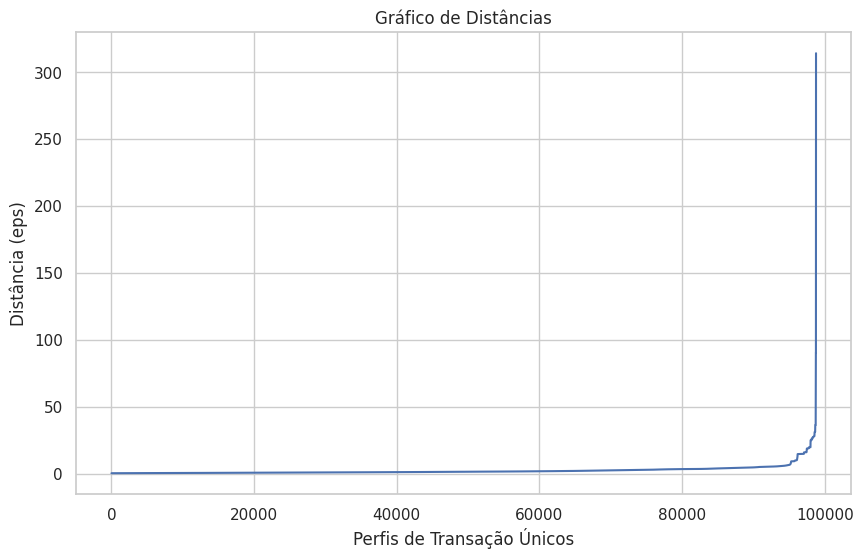

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

print(f"Número de linhas totais (com duplicatas): {len(df_encoded_v2)}")

# remove os perfis de transação duplicados
df_unique = df_encoded_v2.drop_duplicates()

print(f"Número de perfis de transação únicos: {len(df_unique)}")

scaler = StandardScaler()
df_unique_scaled = scaler.fit_transform(df_unique)
print("Dados únicos normalizados com sucesso.")

# recalcula o gráfico de distância no dataset de dados únicos
neighbors = NearestNeighbors(n_neighbors=500)
neighbors_fit = neighbors.fit(df_unique_scaled)
distances, indices = neighbors_fit.kneighbors(df_unique_scaled)

distances = np.sort(distances[:, -1])

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('Gráfico de Distâncias')
plt.xlabel('Perfis de Transação Únicos')
plt.ylabel('Distância (eps)')
plt.grid(True)
plt.show()

In [23]:
from sklearn.neighbors import LocalOutlierFactor

print(f"Trabalhando com {len(df_unique)} perfis de transação únicos.")

# instanciando o modelo LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.005, novelty=True, n_jobs=-1)

print("Treinando o modelo Local Outlier Factor")
lof.fit(df_unique)

print("Fazendo previsões nos dados únicos")
previsoes_lof = lof.predict(df_unique)

df.loc[df_unique.index, 'Anomalia_LOF'] = previsoes_lof

Trabalhando com 98771 perfis de transação únicos.
Treinando o modelo Local Outlier Factor
Fazendo previsões nos dados únicos


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [24]:
anomalias_lof = df[df['Anomalia_LOF'] == -1]

print(f"\nO modelo LOF encontrou {len(anomalias_lof)} anomalias potenciais na amostra.")

colunas_relevantes = [
    'DATA TRANSAÇÃO', 'NOME ÓRGÃO SUPERIOR', 'NOME FAVORECIDO',
    'TipoDeGasto',
    'VALOR TRANSAÇÃO'
]

print("\n--- Anomalias Encontradas pelo LOF ---")
print(anomalias_lof[colunas_relevantes].sort_values(by='VALOR TRANSAÇÃO', ascending=False).to_string())


O modelo LOF encontrou 393 anomalias potenciais na amostra.

--- Anomalias Encontradas pelo LOF ---
       DATA TRANSAÇÃO                           NOME ÓRGÃO SUPERIOR                                                                         NOME FAVORECIDO             TipoDeGasto  VALOR TRANSAÇÃO
82228      2024-10-03                          Ministério da Defesa                                                          MARAJO LOCACAO E SERVICOS LTDA                Serviços        189650.00
82132      2024-10-04                          Ministério da Defesa                                                    FRANCISCO E. SILVA CAPIISTRANIO LTDA                  Outros        168000.00
88342      2024-10-17     Ministério da Justiça e Segurança Pública                                                                          SEM INFORMACAO  Informática/Tecnologia        122038.19
73912      2024-09-17     Ministério da Justiça e Segurança Pública                                            

svm

In [26]:
from sklearn.svm import OneClassSVM

print(f"Iniciando a implementacao do One-Class SVM em {len(df_unique)} perfis únicos.")

one_class_svm = OneClassSVM(kernel='rbf', nu=0.005, gamma='auto')

print("Treinando o modelo One-Class SVM")
one_class_svm.fit(df_unique_scaled)

print("Fazendo previsões")
previsoes_svm = one_class_svm.predict(df_unique_scaled)

df.loc[df_unique.index, 'Anomalia_SVM'] = previsoes_svm

Iniciando a implementacao do One-Class SVM em 98771 perfis únicos.
Treinando o modelo One-Class SVM
Fazendo previsões


In [27]:
anomalias_svm = df[df['Anomalia_SVM'] == -1]

print(f"\nO modelo One-Class SVM encontrou {len(anomalias_svm)} anomalias potenciais.")

colunas_relevantes = [
    'DATA TRANSAÇÃO', 'NOME ÓRGÃO SUPERIOR', 'NOME FAVORECIDO',
    'TipoDeGasto',
    'VALOR TRANSAÇÃO'
]

print("\n--- Anomalias Encontradas pelo One-Class SVM")
print(anomalias_svm[colunas_relevantes].sort_values(by='VALOR TRANSAÇÃO', ascending=False).to_string())


O modelo One-Class SVM encontrou 501 anomalias potenciais.

--- Anomalias Encontradas pelo One-Class SVM
       DATA TRANSAÇÃO                           NOME ÓRGÃO SUPERIOR                                                                            NOME FAVORECIDO             TipoDeGasto  VALOR TRANSAÇÃO
82228      2024-10-03                          Ministério da Defesa                                                             MARAJO LOCACAO E SERVICOS LTDA                Serviços        189650.00
82132      2024-10-04                          Ministério da Defesa                                                       FRANCISCO E. SILVA CAPIISTRANIO LTDA                  Outros        168000.00
88342      2024-10-17     Ministério da Justiça e Segurança Pública                                                                             SEM INFORMACAO  Informática/Tecnologia        122038.19
73912      2024-09-17     Ministério da Justiça e Segurança Pública                           

In [28]:
# Pega os índices das anomalias de cada modelo
idx_if = anomalias_if.index
idx_lof = anomalias_lof.index

# Encontra a interseção dos índices
idx_if_lof = idx_if.intersection(idx_lof)

anomalias_if_lof = df.loc[idx_if_lof]

idx_svm = anomalias_svm.index

idx_todos = idx_if_lof.intersection(idx_svm)

anomalias_todos = df.loc[idx_todos]

print(f"Número de anomalias encontradas pelo Isolation Forest: {len(idx_if)}")
print(f"Número de anomalias encontradas pelo Local Outlier Factor: {len(idx_lof)}")
print(f"Número de anomalias encontradas por todos os modelos: {len(anomalias_todos)}")

print("\n--- Anomalias Encontradas por todos os modelos ---")
print(anomalias_todos[colunas_relevantes].sort_values(by='VALOR TRANSAÇÃO', ascending=False).to_string())

Número de anomalias encontradas pelo Isolation Forest: 523
Número de anomalias encontradas pelo Local Outlier Factor: 393
Número de anomalias encontradas por todos os modelos: 10

--- Anomalias Encontradas por todos os modelos ---
       DATA TRANSAÇÃO                        NOME ÓRGÃO SUPERIOR                                                         NOME FAVORECIDO             TipoDeGasto  VALOR TRANSAÇÃO
88342      2024-10-17  Ministério da Justiça e Segurança Pública                                                          SEM INFORMACAO  Informática/Tecnologia        122038.19
73912      2024-09-17  Ministério da Justiça e Segurança Pública                                                          SEM INFORMACAO  Informática/Tecnologia        103864.77
89036      2024-10-24  Ministério da Justiça e Segurança Pública                                                          SEM INFORMACAO  Informática/Tecnologia         52812.38
31130      2024-08-20                      Ministério da 

In [29]:
from sklearn.metrics import silhouette_score

score_if = silhouette_score(df_encoded, previsoes_iso_forest)
score_lof = silhouette_score(df_unique, previsoes_lof)
score_svm = silhouette_score(df_unique_scaled, previsoes_svm)

print(f"Silhouette Score do Isolation Forest: {score_if}")
print(f"Silhouette Score do Local Outlier Factor: {score_lof}")
print(f"Silhouette Score do One-Class SVM: {score_svm}")

Silhouette Score do Isolation Forest: 0.7170167618742386
Silhouette Score do Local Outlier Factor: 0.8800666987171208
Silhouette Score do One-Class SVM: 0.6717822025347114
